<a href="https://colab.research.google.com/github/TenGiCungDuocMa/ML_2024_21130536_Tran_Bui_Quoc_Thang/blob/main/Lab_4_21130536_TranBuiQuocThang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks.

*   **Deadline: 23:59, 01/04/2024**



# Import libraries

In [42]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from prettytable import PrettyTable
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


#Task 1.
Apply **LogisticRegression** to iris dataset to classify species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'.



```
from sklearn import datasets
data1 = datasets.load_iris()
```




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9666666666666667
Precision :  0.9714285714285714
Recall :  0.9666666666666667
F1 measure:  0.9672820512820512


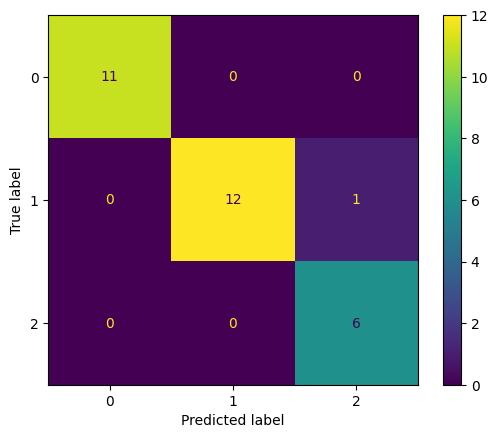

In [24]:
# code

data1 = datasets.load_iris(as_frame=True)
classifier = LogisticRegression(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target, test_size = 0.2, random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

AccuracyLogisticRegression = accuracy_score(y_test, y_pred)
PrecissionLogisticRegression = precision_score(y_test, y_pred, average='weighted')
RecallLogisticRegression = recall_score(y_test, y_pred, average='weighted')
F1LogisticRegression = f1_score(y_test, y_pred, average='weighted')
print ("Accuracy : ", AccuracyLogisticRegression)
print ("Precision : ", PrecissionLogisticRegression)
print ("Recall : ", RecallLogisticRegression)
print ("F1 measure: ", F1LogisticRegression)

metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#Task 2.
Apply LogisticRegression to **FASHION** dataset (*fashion_train.csv* and *fashion_test.csv*) which aims at classifying 10 fashion categories. Dataset includes 784 pixels values of images (28x28). This pixel-value is an integer between 0 and 255. Each training and test example is assigned to one of the following labels:

*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

In [3]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/LabML'


Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/LabML


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.786
Precision :  0.7905625043676323
Recall :  0.786
F1 measure:  0.785740663522799


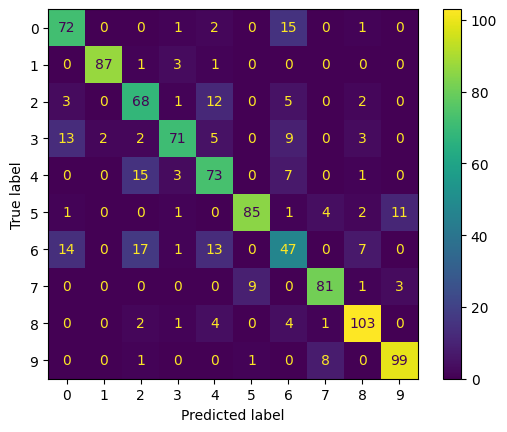

In [25]:
#code
dataFashionTrain = pd.read_csv('fashion_train.csv')
dataFashionTest = pd.read_csv('fashion_test.csv')

classifier = LogisticRegression(random_state = 0)
X_train = dataFashionTrain.iloc[:, :785]
y_train = dataFashionTrain.iloc[:, -1]
X_test = dataFashionTest.iloc[:, :785]
y_test = dataFashionTest.iloc[:, -1]
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
AccuracyLogisticRegression_Fashion = accuracy_score(y_test, y_pred)
PrecissionLogisticRegression_Fashion = precision_score(y_test, y_pred, average='weighted')
RecallLogisticRegression_Fashion = recall_score(y_test, y_pred, average='weighted')
F1LogisticRegression_Fashion = f1_score(y_test, y_pred, average='weighted')
print ("Accuracy : ", AccuracyLogisticRegression_Fashion)
print ("Precision : ", PrecissionLogisticRegression_Fashion)
print ("Recall : ", RecallLogisticRegression_Fashion)
print ("F1 measure: ", F1LogisticRegression_Fashion)

metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#Task 3.
Apply another classification algorithm named **kNN**, which is an instance classifcation model.
*  3.1. Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: **accuracy, precision, recall, f1 measure**) using **PrettyTable**.


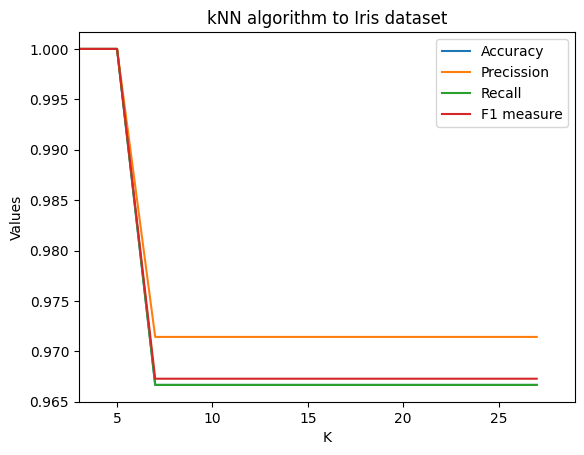

+------------+-----------------------+---------------------+
|            | kNN algorithm (k = 9) | Logistic regression |
+------------+-----------------------+---------------------+
| Accuracy   |   0.9666666666666667  |  0.9666666666666667 |
| Precission |   0.9714285714285714  |  0.9714285714285714 |
|   Recall   |   0.9666666666666667  |  0.9666666666666667 |
| F1 measure |   0.9672820512820512  |  0.9672820512820512 |
+------------+-----------------------+---------------------+


In [26]:
# code
#3.1
X_train, X_test, y_train, y_test = train_test_split(data1.data, data1.target, test_size = 0.2, random_state = 1)
k = []
Accuracy = []
Precission = []
Recall = []
F1 = []
for i in range(3, 29, 2):
  k.append(i)
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  Accuracy.append(accuracy_score(y_test, y_pred))
  Precission.append(precision_score(y_test, y_pred, average='weighted'))
  Recall.append(recall_score(y_test, y_pred, average='weighted'))
  F1.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(k,Accuracy, label="Accuracy")
plt.plot(k,Precission,label='Precission')
plt.plot(k,Recall,label='Recall')
plt.plot(k,F1,label="F1 measure")
plt.xlabel('K')
plt.ylabel('Values')
plt.xlim(3,29)
plt.title('kNN algorithm to Iris dataset')
plt.legend()
plt.show()
#3.2
table = PrettyTable()

table.field_names = [" ","kNN algorithm (k = 9)", "Logistic regression"]

table.add_row(["Accuracy ",Accuracy[3], AccuracyLogisticRegression])
table.add_row(["Precission",Precission[3], PrecissionLogisticRegression])
table.add_row(["Recall",Recall[3], RecallLogisticRegression])
table.add_row(["F1 measure",F1[3],F1LogisticRegression])

print(table)

#Task 4.
Similar to Task 3, apply kNN algorithm to **FASHION** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={3, 5, …, 29}. Select the best value of k. Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.2.	Plot the values of **accuracy, precision, recall, f1 measure** metrics with different values of k.
*  4.3.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


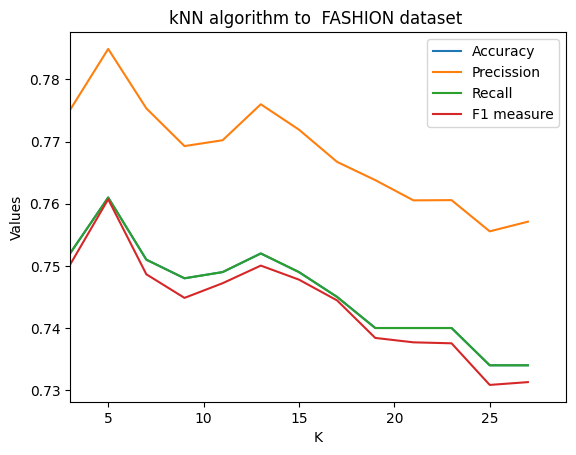

+------------+-----------------------+---------------------+
|            | kNN algorithm (k = 5) | Logistic regression |
+------------+-----------------------+---------------------+
| Accuracy   |         0.761         |        0.786        |
| Precission |   0.7849144007407373  |  0.7905625043676323 |
|   Recall   |         0.761         |        0.786        |
| F1 measure |   0.7607265009517986  |  0.785740663522799  |
+------------+-----------------------+---------------------+


In [27]:
# code
X_train = dataFashionTrain.iloc[:, :785]
y_train = dataFashionTrain.iloc[:, -1]
X_test = dataFashionTest.iloc[:, :785]
y_test = dataFashionTest.iloc[:, -1]
k = []
Accuracy = []
Precission = []
Recall = []
F1 = []
for i in range(3, 29, 2):
  k.append(i)
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  Accuracy.append(accuracy_score(y_test, y_pred))
  Precission.append(precision_score(y_test, y_pred, average='weighted'))
  Recall.append(recall_score(y_test, y_pred, average='weighted'))
  F1.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(k,Accuracy, label="Accuracy")
plt.plot(k,Precission,label='Precission')
plt.plot(k,Recall,label='Recall')
plt.plot(k,F1,label="F1 measure")
plt.xlabel('K')
plt.ylabel('Values')
plt.xlim(3,29)
plt.title('kNN algorithm to  FASHION dataset ')
plt.legend()
plt.show()

table = PrettyTable()

table.field_names = [" ","kNN algorithm (k = 5)", "Logistic regression"]

table.add_row(["Accuracy ",Accuracy[1], AccuracyLogisticRegression_Fashion])
table.add_row(["Precission",Precission[1], PrecissionLogisticRegression_Fashion])
table.add_row(["Recall",Recall[1], RecallLogisticRegression_Fashion])
table.add_row(["F1 measure",F1[1],F1LogisticRegression_Fashion])

print(table)

#Task 5.
Compare the performance of selected classification algorithms (**Decision Tree, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered **spam (1) or not (0)**, i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:
*  **48 continuous real [0,100] attributes** of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  **6 continuous real [0,100] attributes** of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  **1 continuous real [1,...] attribute** of type capital_run_length_average
= average length of uninterrupted sequences of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters
*  **1 continuous integer [1,...] attribute** of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  **1 nominal {0,1} class attribute** of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


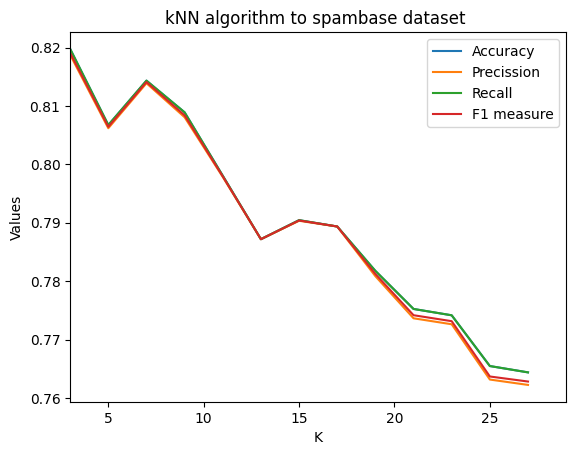

+------------+---------------------+---------------------+--------------------+
|            | kNN algorithm (k=7) | Logistic Regression |   Decision Tree    |
+------------+---------------------+---------------------+--------------------+
| Accuracy   |  0.8143322475570033 |  0.9847991313789359 | 0.7643865363735071 |
| Precission |  0.8138917580833437 |  0.9847931224042729 | 0.7622391240137906 |
|   Recall   |  0.8143322475570033 |  0.9847991313789359 | 0.7643865363735071 |
| F1 measure |  0.8140872474915359 |  0.9847912339404806 | 0.7628194158269941 |
+------------+---------------------+---------------------+--------------------+


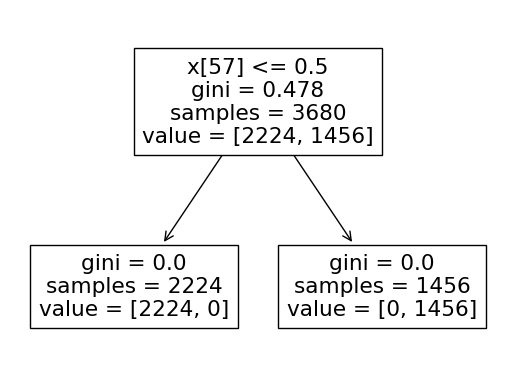

In [46]:
# code
dataspambase = pd.read_csv('spambase.csv')
X_train, X_test, y_train, y_test = train_test_split(dataspambase.iloc[:, : 58],dataspambase.iloc[:,  -1], test_size = 0.2, random_state = 1)

#Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

AccuracyLogisticRegression = accuracy_score(y_test, y_pred)
PrecissionLogisticRegression = precision_score(y_test, y_pred, average='weighted')
RecallLogisticRegression = recall_score(y_test, y_pred, average='weighted')
F1LogisticRegression = f1_score(y_test, y_pred, average='weighted')


#kNN algorithm
k = []
Accuracy = []
Precission = []
Recall = []
F1 = []
for i in range(3, 29, 2):
  k.append(i)
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  Accuracy.append(accuracy_score(y_test, y_pred))
  Precission.append(precision_score(y_test, y_pred, average='weighted'))
  Recall.append(recall_score(y_test, y_pred, average='weighted'))
  F1.append(f1_score(y_test, y_pred, average='weighted'))

plt.plot(k,Accuracy, label="Accuracy")
plt.plot(k,Precission,label='Precission')
plt.plot(k,Recall,label='Recall')
plt.plot(k,F1,label="F1 measure")
plt.xlabel('K')
plt.ylabel('Values')
plt.xlim(3,29)
plt.title('kNN algorithm to spambase dataset ')
plt.legend()
plt.show()

#Decision Tree
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=3, min_samples_leaf=5)
clf_model.fit(X_train,y_train)
# Plot decision tree
tree.plot_tree(clf_model)
# Predict X_test
y_predict = clf_model.predict(X_test)

AccuracyDecisionTree = accuracy_score(y_test, y_pred)
PrecissionDecisionTree = precision_score(y_test, y_pred, average='weighted')
RecallDecisionTree = recall_score(y_test, y_pred, average='weighted')
F1DecisionTree = f1_score(y_test, y_pred, average='weighted')

t = PrettyTable([' ','kNN algorithm (k=7)','Logistic Regression', 'Decision Tree'])

t.add_row(["Accuracy ",Accuracy[2], AccuracyLogisticRegression,AccuracyDecisionTree])
t.add_row(["Precission",Precission[2], PrecissionLogisticRegression,PrecissionDecisionTree])
t.add_row(["Recall",Recall[2], RecallLogisticRegression,RecallDecisionTree])
t.add_row(["F1 measure",F1[2],F1LogisticRegression,F1DecisionTree])

print(t)

In [ ]:
from prettytable import PrettyTable

# These 3 are the columns of the tables
t = PrettyTable(['Subject Code', 'Subject', 'Marks'])

# To insert rows:
t.add_row(['K01', 'Maths', 95])
t.add_row(['K04', 'Physics', 89])
t.add_row(['K03', 'Chemistry', 92])
t.add_row(['K08', 'English', 91])
t.add_row(['K29', 'Computer Science', 99])
t.add_row(['K06', 'Social Science', 86])

print(t)

+--------------+------------------+-------+
| Subject Code |     Subject      | Marks |
+--------------+------------------+-------+
|     K01      |      Maths       |   95  |
|     K04      |     Physics      |   89  |
|     K03      |    Chemistry     |   92  |
|     K08      |     English      |   91  |
|     K29      | Computer Science |   99  |
|     K06      |  Social Science  |   86  |
+--------------+------------------+-------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.